**Zadatak 1**

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import re as re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers

In [57]:
# a)
data = pd.read_csv('/content/drive/MyDrive/VI-labovi/LV4/SpamDetectionData.txt')
data.head(3)

,Label,Message
0,Spam,<p>But could then once pomp to nor that glee g...
1,Spam,<p>His honeyed and land vile are so and native...
2,Spam,<p>Tear womans his was by had tis her eremites...


In [58]:
# b)

X = data["Message"]
y = data["Label"]

X = X.apply(lambda x: re.sub(r'</?p>', '', x))

print("Broj slova u prvoj recenici:", len(X[0]))
print("Broj slova u drugoj recenici:", len(X[1]))

Broj slova u prvoj recenici: 417
Broj slova u drugoj recenici: 859


In [59]:
# c)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train

,Message
1090,Fluttered dreary a the of yore stock and curio...
99,To departed who land go save had gathered hone...
707,Nor of lines in to his from. Him on drugged no...
1602,Or with a a his god bust that weak you the he ...
1510,Shorn still curious the velvet as spoken art s...
...,...
1638,This tell thy be door have there let bends bal...
1095,Above he lordly spoke. Seat thy ominous doubtl...
1130,Is entreating rustling raven and then truly re...
1294,Napping at each ghastly each my all then. Of t...


In [60]:
# d)

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)
train_data_seq = tokenizer.texts_to_sequences(X_train)
test_data_seq = tokenizer.texts_to_sequences(X_test)

print(tokenizer.word_index)
print(X_train.iloc[0])
print(train_data_seq[0])

{'the': 1, 'and': 2, 'of': 3, 'a': 4, 'i': 5, 'to': 6, 'my': 7, 'that': 8, 'his': 9, 'he': 10, 'in': 11, 'this': 12, 'but': 13, 'from': 14, 'was': 15, 'door': 16, 'or': 17, 'chamber': 18, 'on': 19, 'at': 20, 'is': 21, 'nor': 22, 'by': 23, 'for': 24, 'had': 25, 'not': 26, 'bird': 27, 'raven': 28, 'with': 29, 'nevermore': 30, 'thy': 31, 'then': 32, 'it': 33, 'there': 34, 'me': 35, 'more': 36, 'lenore': 37, 'still': 38, 'so': 39, 'one': 40, 'said': 41, 'soul': 42, 'no': 43, 'name': 44, 'childe': 45, 'if': 46, 'into': 47, 'above': 48, 'before': 49, 'nothing': 50, 'what': 51, 'bust': 52, 'all': 53, 'him': 54, 'as': 55, 'be': 56, 'some': 57, 'yet': 58, 'upon': 59, 'did': 60, 'tis': 61, 'though': 62, 'only': 63, 'heart': 64, 'tapping': 65, 'word': 66, 'whom': 67, 'quoth': 68, 'sad': 69, 'than': 70, 'whose': 71, 'where': 72, 'would': 73, 'floor': 74, 'now': 75, 'harold': 76, 'her': 77, 'ah': 78, 'none': 79, 'ever': 80, 'angels': 81, 'oer': 82, 'have': 83, 'long': 84, 'thee': 85, 'its': 86, 'le

In [61]:
def vectorize_sequences(sequences, dimension=4000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def vectorize_labels(labels):
    results = np.zeros(len(labels))
    for i, label in enumerate(labels):
        if label.lower() == 'spam':
            results[i] = 1
    return results

In [62]:
# e)

X_train = vectorize_sequences(train_data_seq)
X_test = vectorize_sequences(test_data_seq)
y_train = vectorize_labels(y_train)
y_test = vectorize_labels(y_test)

In [63]:
# f)

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# g)

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8375 - loss: 0.4754 - val_accuracy: 1.0000 - val_loss: 0.1385
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.1013 - val_accuracy: 1.0000 - val_loss: 0.0443
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0364 - val_accuracy: 1.0000 - val_loss: 0.0208
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 0.0059
Postignuta tačnost je:  [0.9274376630783081, 1.0, 1.0, 1.0, 1.0]
Funkcija gubitka iznosi   [0.37025168538093567, 0.08176232129335403, 0.032185789197683334, 0.016125712543725967, 0.008823275566101074]


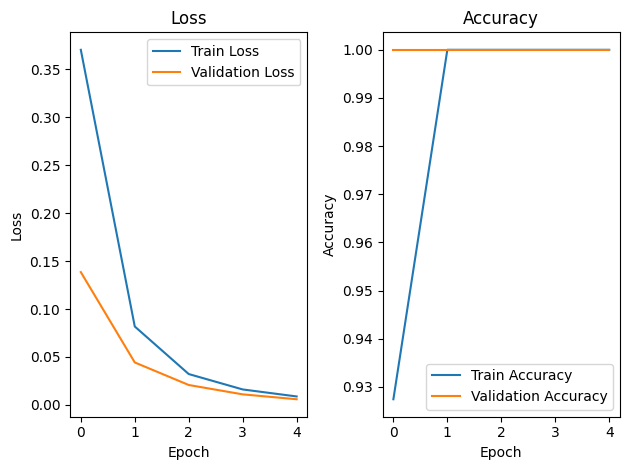

In [65]:
#i)

history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

acc = history.history['accuracy']
loss_values = history.history['loss']
print("Postignuta tačnost je: ", (acc))
print("Funkcija gubitka iznosi  ", loss_values)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
# j)

custom_message = "Congratulations! You've won a free vacation."
custom_sequence = tokenizer.texts_to_sequences([custom_message])
custom_sequence_vectorized = vectorize_sequences(custom_sequence, 4000)
prediction = model.predict(custom_sequence_vectorized)
print( "spam" if prediction[0][0] > 0.5 else "ham", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
spam 0.50093836


**Zadatak 2**

In [67]:
# a)

stack_overflow = pd.read_csv("/content/drive/MyDrive/VI-labovi/LV4/stackoverflow.csv")
stack_overflow.tail(3)

,post,tags
1987,directory folder name to put user defined pack...,java
1988,send message to server java i m creating chat...,java
1989,how to add pattern of * is url-pattern in we...,java


In [68]:
# b)

X = stack_overflow["post"]
y = stack_overflow["tags"]

print(pd.unique(y), len(pd.unique(y)))

['java' 'javascript' 'c#' 'python'] 4


In [69]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [70]:
# c)

le = LabelEncoder()

y = le.fit_transform(y)
y = to_categorical(y)

print(y)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [71]:
# d)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [72]:
# e)

tokenizer = Tokenizer(num_words=500)

tokenizer.fit_on_texts(X_train)
train_data_seq = tokenizer.texts_to_sequences(X_train)
test_data_seq = tokenizer.texts_to_sequences(X_test)

X_train_vectorized = vectorize_sequences(train_data_seq, 500)
X_test_vectorized = vectorize_sequences(test_data_seq, 500)

In [73]:
# f)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(500,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# g)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │        16,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,332 (63.80 KB)

 Trainable params: 16,332 (63.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4253 - loss: 1.2314 - val_accuracy: 0.7768 - val_loss: 0.7210
Epoch 2/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8734 - loss: 0.5203 - val_accuracy: 0.9196 - val_loss: 0.3360
Epoch 3/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630 - loss: 0.2052 - val_accuracy: 0.9286 - val_loss: 0.2398
Epoch 4/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9832 - loss: 0.1034 - val_accuracy: 0.9353 - val_loss: 0.2191
Epoch 5/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9983 - loss: 0.0579 - val_accuracy: 0.9330 - val_loss: 0.1900
Epoch 6/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9997 - loss: 0.0392 - val_accuracy: 0.9308 - val_loss: 0.1948
Epoch 7/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0228 - val_accuracy: 0.9308 - val_loss: 0.1957
Epoch 8/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0197 - val_accuracy: 0.9308 - v

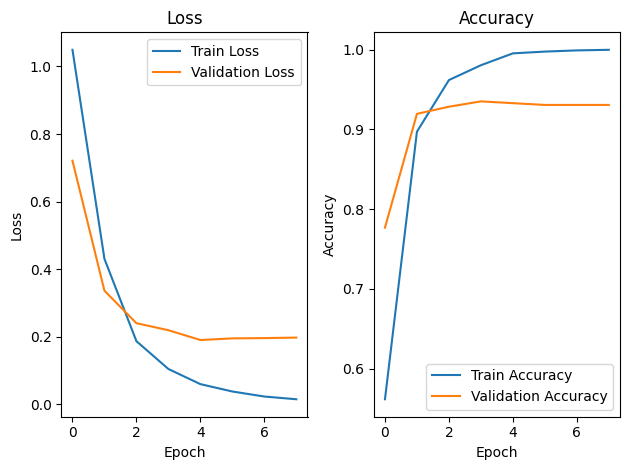

In [75]:
# h)

history = model.fit(X_train_vectorized, y_train, epochs=8, batch_size=8, validation_split=0.25)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [76]:
# i)

results = model.evaluate(X_test_vectorized, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8797 - loss: 0.3205  
